# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [1]:
%matplotlib notebook
# %matplotlib widget
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

import quadrotor

In [2]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [3]:
# we can simulate the robot but we need to provide a controller of the following form
# Part 1 controller to keep robot at zero, zero without any disturbance.
def controller_for_setup(state, i):
    # here we do nothing and just return some non-zero control
    U = (0.6*9.81/2)*np.ones([2,])
    # return 1. * np.ones([2,])
    return U




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, controller_for_setup, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


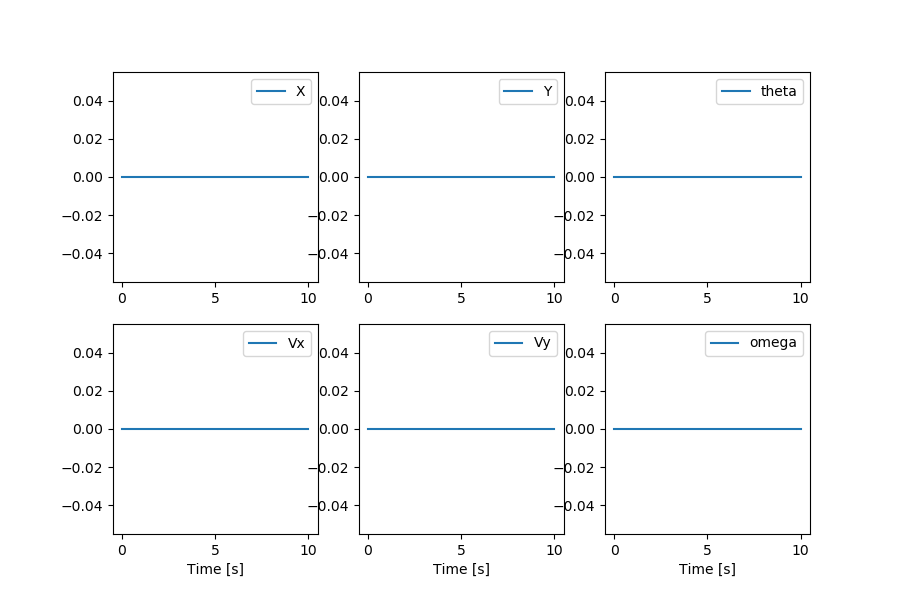

<IPython.core.display.Javascript object>


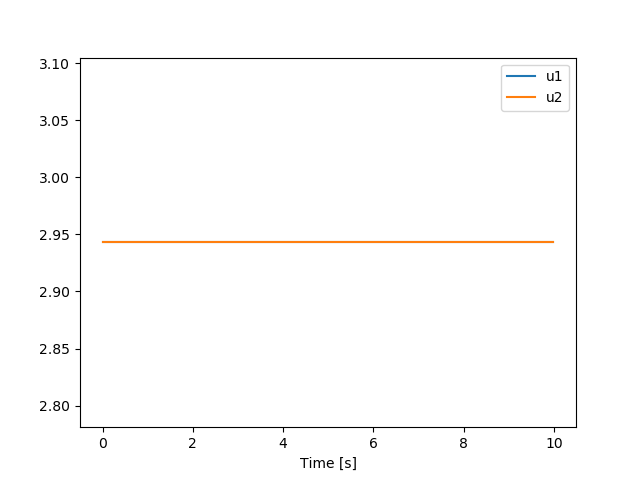

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAjwm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATEWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqF/fg3H3RwnGywElOWnD/iUbYrVlOD93wcAAB1j
mojtX48gAAJK32dUCZsNACxV8htVJ9HRICyDX1d9mKu02gUV00ECgRM+eUw3cCBd1L6ITIDwblCZ
pA3Dm7zFXHXV8XonxFbA7FPTZ/zFA/UdThP2zpDRiQY+H/Z1pmwgsqY2oz81qPKnhvqx9KpW8hqu
+/vWQHKBgXqQNGrPHols8i5PN/sFRw5SXv4gI/wcAUUpFFOzE30LCrEV8Sl0oPYhPlkkwnMjP2G5
x7w74P7AXEP1TFMz61IvYuV8o5lVRjxQi7RQg7rkI3IYAwDs6/7F3EA+kgy6GD1MvuRxU2fJsBFR
V/GWbtE8ZgF/HnW57IQTudBXWaDRScPsBnlg4+dM3gCmHy8JmIT/KL0h5/R+gespzc4W29ELH7WW
QqmetrW3bpditpsP2Nms3hXO6HHfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6GsA
TmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT2T
x8obB6F1JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJump
Os9mtZnz3zJvzztARahFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQAQZ
qMTbxEOjWUOWuRI6cVmq3X/Og9AJ5RU2jbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoynd
LW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30tkv
fWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwOwJRv1UWTr8iJ3mie
U7Gt4zJBiefY/XmsOEKvOTsVe11/7uK1qd2yzvksafyGCimdpVGlGFEW2S8HelDTg2nT5cwpaF6h
ei02jTL8IMjLGIoGHQurR

In [4]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

plt.show()
quadrotor.animate_robot(state,u)

<IPython.core.display.Javascript object>


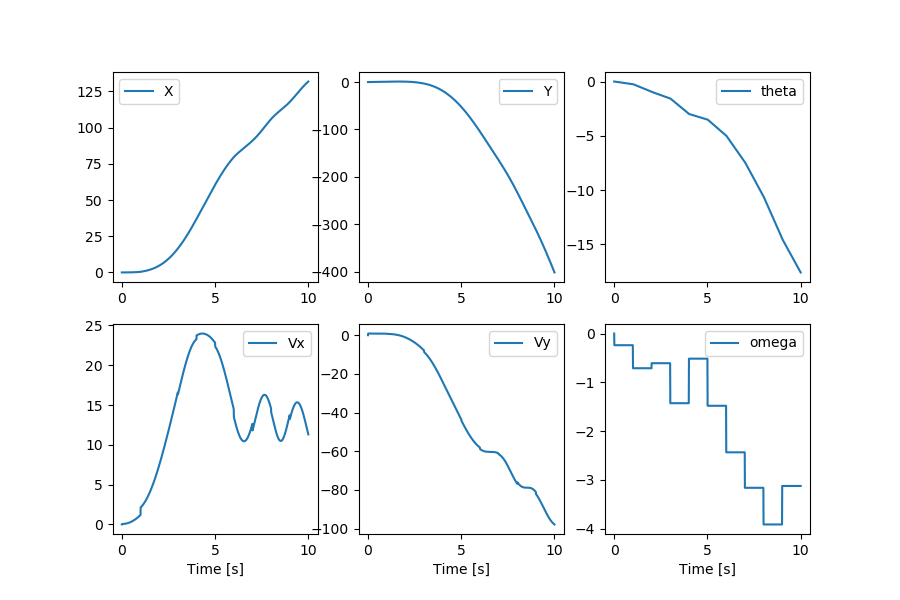

<IPython.core.display.Javascript object>


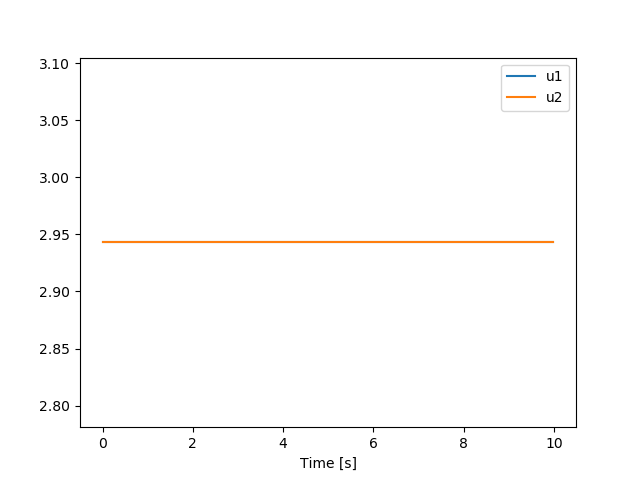

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA5+G1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASN2WI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMAALcA
GFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxSMtmu
F6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7mL/9
3+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGhBm8hUCYOBwO6jk+VYPTf6/Du1ir31n7L5sfJF40
WvGjfPYQDhAEmwQVpHGUCqNKDUSWRVYyXlgcUxYw9XjhTz+vx76BgcaMJ4KVpVnwEfgUbplaCSJx
FPqKGwp3WlZZBOgJrXBhRrpbFmPW16yiB2HGdaE/rYVZrpQqE/NWlCVwLzFsSVXhaMhwyKlIHYXC
zI57g+OIMWaAJiq8F6w7jkIzR52fDWmpLT/JM4U8H7+45gKyAC4c1qQfVsAiIFyAW6QiI9Hkdw68
WuTxHsdyww/lwIPTQ7MVvHHHtpfxUdNiFUyWmZqWV7VkOX9wT/ALctZL9/HHrpULFYXSY3uoNJdA
Y+l5o2AS0uadrYVwaLwg5OerXMFtKVwJp+X39oV15iORr5dKw2lPYWSNxcwzYtd0zWJpEg39Uis5
6Jsw8DvRsbXL5iK7/33v4lx3oImHzOt17U+ygf0DHsVXRKwz4MmiqNn/FfjarzfsmPP57I39hBcd
pvMmOANtIf5878Y9CRjC3h4u8K+LH+zwaz5juMmnufyo0jRIYms51Od/FHaf1TUlft4MWLg/Z2QK
07aj77eMi89/axfRKDwC7UVhDeHd/aGrxomPbns+yhRzorcEsmpG/jyN8KW+YaLGhykWbCJ85PQn
3+z3IRc3iyK/HoCCS4SghLXuT4Xkcp5sdfVDUwAAAwAAAwAAAwAABP4bZZQCtOCjdvG0Ajp4M6UL
jVCsreA+QcMDpOSHv8PDGxhqPuLpnP+1zeMT4CE1/7/D+MVytHJz6vGt+qAEfyTRDOPkwWqV+MY/
m/cAflfJcE9ztqaeiEhmMd4YkIhQvSPW1AIfv+DpYjljfC+gu/1XWYeg2OEL2xwJhBH5k/R1RkHY
SUUD/51lGgU/qvT4EtcZFThDuVRN4/+ZmB4NzAOxEYZrwKL0CIUCDtlkNGWCkJn0J/HOlDI8CbN2
hfeHaboYDb9OafImRTeGwleLIOFmV32k0kNTzQC+0xJANUQSQG0clW9//IrEAaSE+aIg64l2SjH/
Ujpn+e15sylRIB8nchgGIsDTgLtkA2wwtoZjADHn+VNlI/AfMnEtajShSYzKmQ9NRyBuHPzx/AAA
AwAAAwAAAwAAyDbHPTOwpUOUXIW3DenJ6QoPh8mkEFEMxGLjMOWMsBQaLHk0oVP9VylD1GgCJwmz
pOb8uwdVLv77lDL3raej2uyfQ+jK0F71qp+gbS+PBobfnjTzDNjlirXRXEqCT02CgX0WWUuZGTlH
OLcp5XHgPkxhExtgqbXQCC2Sb0I3YtgPgral+tXljut0JQ7N1xryPvM5Np7pwLjgXDTkIUB1gg4q
aqBXw7jbk4kVucDNwu1upiuE5VA0YyRpMTS9MLnLHssfAn2U/eHGcaGVfuAydjKq8CKZeWBlvt+d
Tga3grrvA1FD9sNqZ0RHYBqZS5kLBe37q6SWQUdP93/hFPTN+ij/ehvE1TvcMkfyMWyuI8axovmA
vkkgjqM8xbhCXsGYpYgiAwiNm9ON75UD4CuFQ184a8tG3uyerr5l+unWokBBotGXbBWiEeIMGb9z
I6cVgoktGwQS3B64cErVaMaTp6iK+3ohBqA3V8woi49QBTApuAAAD0j83vACgeIrbbgACO8qxuq4
P96RJQ+LR7GpuYvX6tyub5Y5diwjZf7L+j77q2NhN7Qm/QrkxYteKcqYigSqCuUFaM9ZbPSD29ZO
HMBXkTAZJqjHa42Gqthd/xoNdhIH4FbOngAURfFyOKk+fHlLNgfCrDPfxzM7txOrMSCrv8p65xf7
FKYbOPOtrqHC49XM0yZkfGCFHrg0F7iNUAVIXle65mdfttGAV2SP6vaO7ZIyYDFVKOm5ORyOHMr9
Dw/Yp5h/0FPn6I/KpgQAByt95Bs+AQUWzYYTUUeCyAh0GNhaMVSnazpT+LJMJj5UVQEJaZE6q/vv
kqdcRWre/AYKaaXRVLF6KXpOL8WzwbB/QiH6j8zP5dn60jEo+b6war5LlxZm64dUEvz0ftEsPxI6
e2k2Jw2S58jUZGyrXtqckgsGlaCBn4O9Mk4p/UgjKArm/iAPOlcaidNhHLm0QnQxy8YsUQk4d6ho
3f5tzeQ0eFJYRObs6wt3ayZtX/aZjTwmLV37vJmFTjSwRXHIThSIvun7iLbwFHXYs0LiAVx991cv
7IwRY/Jx9myh9p7cBPUPD8mkKSCw5gvlIBYtLN48JcypBn1dXzFYWPA8AuSW24uYd9NFNJj+zSfP
Zmrd/6t8QU2cSt6Vzov348WgIP+vWnrYb/74o0+QU2CcLo3wUpCjvPdnRZp4IgrsM+O0aaTSP934
PvjOJ5EBtSQYwtmcPtzW8EJ9+FbGV4hjcE6PzLYJaF5yjgcfX5ETu5S9tKk2gq9OB9X15y7/OQm6
0O+B9+T/2Qycu1cSI7dbSlZYLbNhWplvvVxOVSyRUUvINiXfeyP5nc1VnNXayRKfCLXP9nvSgjRx
QXWcQBoMipuczK/jfhs5D31thoJTX3j0exqAAABxKjHJwCqhqPpiPgAAAwAACLdabeaVuvvfd2Yv
bo+sUu+CL/bhGTs0a1DJDj7l2rsJ5qycLjasayLn/x4recHaRq6y/piO/Hy1OnSI2bq+PCLo2Sfe
QUqxM2Yimnzm5Hh8/mB9G

In [5]:
# Part 1 Turbulance On
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, controller_for_setup, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)

In [6]:
# Part 2

# Part 2.2
def get_linearization(z,u):
    A = np.array([[1, quadrotor.DELTA_T, 0,0,0,0],[0,1,0,0,-quadrotor.DELTA_T*(u[0]+u[1])*math.cos(z[4])/quadrotor.MASS,0],[0,0,1,quadrotor.DELTA_T,0,0],[0,0,0,1,-quadrotor.DELTA_T*(u[0]+u[1])*math.sin(z[4])/quadrotor.MASS,0],[0,0,0,0,1,quadrotor.DELTA_T],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS,-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS, quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,-quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])
    return A, B

# We need to get a stable value of P and K, So, I used backward riccati equations to get P and K that I use in
# infinite horizon LQR.

def solve_LQR(A, B, Q, R, QN, N):

    P = QN
    list_of_P = []
    list_of_K = []
    list_of_P.append(P)

    for i in reversed(range(N)):
        tempk = -np.matmul(np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matmul(B.transpose(),P),B) + R),B.transpose()),P),A)
        tempp = Q + np.matmul(np.matmul(A.transpose(),P),A) + np.matmul(np.matmul(np.matmul(A.transpose(),P),B),tempk)
        P = tempp
        list_of_K.insert(0,tempk)
        list_of_P.insert(0,tempp)
        
    return list_of_P, list_of_K

z0 = np.zeros([quadrotor.NUMBER_STATES,])
U = (0.6*9.81/2)*np.ones([2,])

[A, B] = get_linearization(z0,U)

N = 1000

Q = np.array([[20000, 0, 0, 0, 0, 0],
             [0, 1000, 0, 0, 0, 0],
             [0, 0, 20000, 0, 0, 0],
             [0, 0, 0, 1000, 0, 0],
             [0, 0, 0, 0, 500, 0],
             [0, 0, 0, 0, 0, 50]])
R = np.identity(2)

[p,k] = solve_LQR(A,B,Q,R,Q,N)

global P
K = k[0]
P = p[0]

U_temp = (0.6*9.81/2)*np.ones([2])

def controller_to_stay(state, i):
    global U
    global P

    # here we do nothing and just return some non-zero control

    U_star = (0.6*9.81/2)*np.ones([2,])
    if i == 0:
        U = U_star
        P = p[0]
    [A,B] = get_linearization(state,U)
    P = Q + np.matmul(np.matmul(A.transpose(),P),A) - np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(np.matmul(A.transpose(),P),B),np.linalg.inv(np.matmul(np.matmul(B.transpose(),P),B) + R)),B.transpose()),P),A)
    K = -np.matmul(np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matmul(B.transpose(),P),B) + R),B.transpose()),P),A)
    U = U_star + np.matmul(K,state - z0)
    
    return U

horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, controller_to_stay, horizon_length, disturbance = False)

<IPython.core.display.Javascript object>


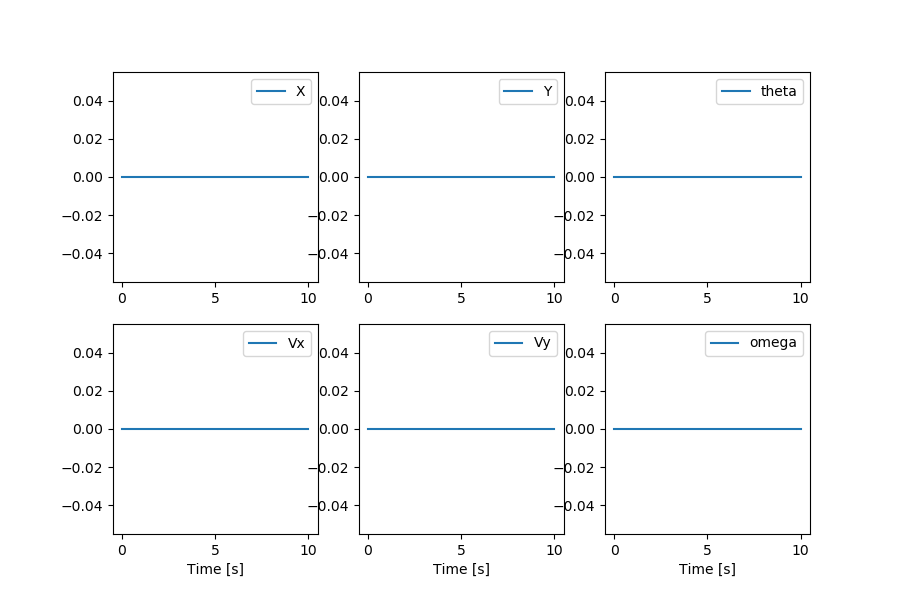

<IPython.core.display.Javascript object>


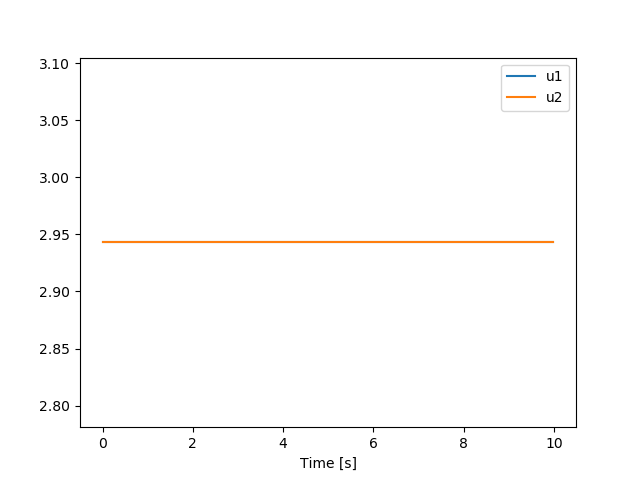

Text(0.5, 0, 'Time [s]')

In [7]:
# Part 2

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [8]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAjwm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATEWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqF/fg3H3RwnGywElOWnD/iUbYrVlOD93wcAAB1j
mojtX48gAAJK32dUCZsNACxV8htVJ9HRICyDX1d9mKu02gUV00ECgRM+eUw3cCBd1L6ITIDwblCZ
pA3Dm7zFXHXV8XonxFbA7FPTZ/zFA/UdThP2zpDRiQY+H/Z1pmwgsqY2oz81qPKnhvqx9KpW8hqu
+/vWQHKBgXqQNGrPHols8i5PN/sFRw5SXv4gI/wcAUUpFFOzE30LCrEV8Sl0oPYhPlkkwnMjP2G5
x7w74P7AXEP1TFMz61IvYuV8o5lVRjxQi7RQg7rkI3IYAwDs6/7F3EA+kgy6GD1MvuRxU2fJsBFR
V/GWbtE8ZgF/HnW57IQTudBXWaDRScPsBnlg4+dM3gCmHy8JmIT/KL0h5/R+gespzc4W29ELH7WW
QqmetrW3bpditpsP2Nms3hXO6HHfAKpLFmYNjlA/fn+a284hre3ZjmN6fEbrVDQUbcyk+KOf6GsA
TmTgU+NHTXhKvdI/iLu0SJmLC7d9mr2kmMg6jbk0SkNEmntubDlG0sq79h5+pYPv1kImcncsZT2T
x8obB6F1JgFmpyPWMFb1bz7Ag+vngeSRDV6625X6QHNeuX91GQyfbpJFD+y+lhDcbI7+zzXEJump
Os9mtZnz3zJvzztARahFeh3aY2J0Ljjg6t0uPmpPkNt5oGzBenyN7VWT3KEY5IJPyI0PuOwAQAQZ
qMTbxEOjWUOWuRI6cVmq3X/Og9AJ5RU2jbSc+aeRu+cvrfPqfMZdquVC6isOmFrNmQ3NxaAmoynd
LW6uDEv2tgD7TV8AGEnrwTbhCylaCJtT7VfEbDEqiAjw26YJS2fzaDNWAATwRSsz8dxhdEz30tkv
fWDVCx2JX4tZpGe972rzKUOQAqtIX90Sy4DYNFQbHHDhMr0E+J9GGisezAwOwJRv1UWTr8iJ3mie
U7Gt4zJBiefY/XmsOEKvOTsVe11/7uK1qd2yzvksafyGCimdpVGlGFEW2S8HelDTg2nT5cwpaF6h
ei02jTL8IMjLGIoGHQurR

<IPython.core.display.Javascript object>


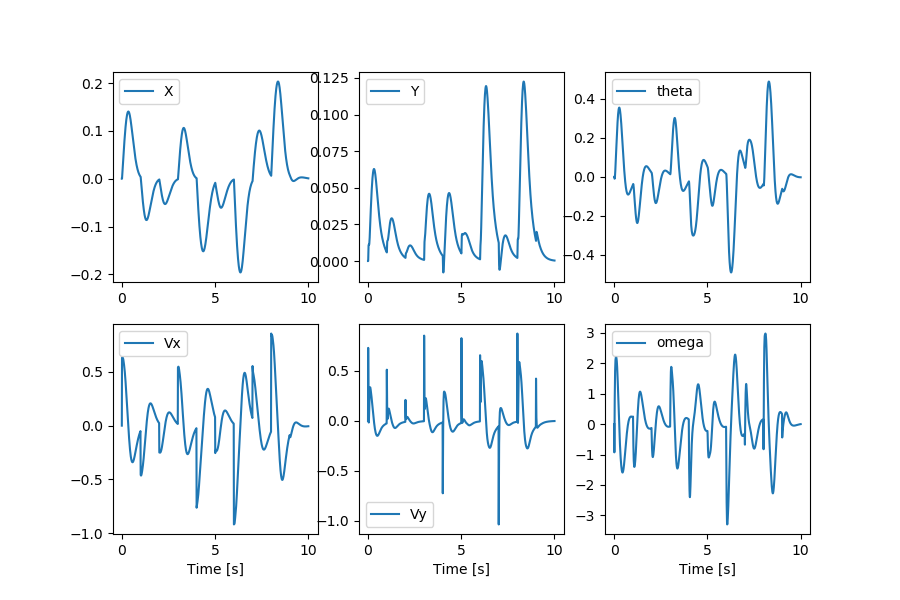

<IPython.core.display.Javascript object>


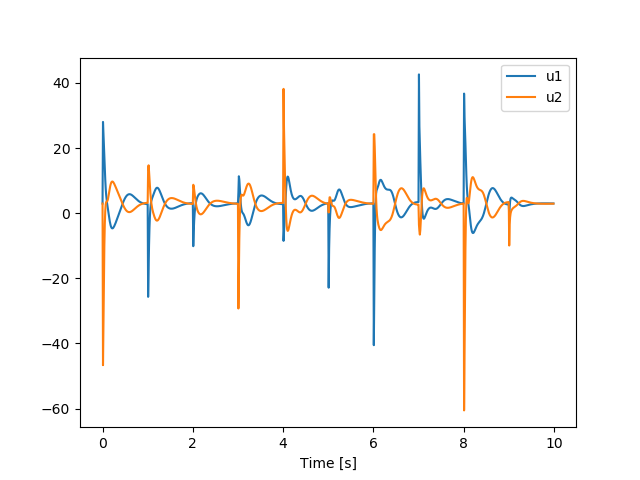

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB7AW1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASTmWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPcjdqbXtPkg+nZo/Nh1R3wzKSw6G5arF3yhIZSIAAql
56s2d+ZwAACk19VPa0bIgAuVfIIayfWsyHyd9KLwholBpOkbJoFeks20D6EfWMF4CQijDU4yNq0Y
vBcx68+r7sr3y4tINPG6CsdWHk5TS4n8uRclA4fl8Atk0svz84o5gZQv/SahrOtCiEWeYb0MgxsJ
dPjbfRsiZZYY6vIbtbDVCfP8ErWXhN0MGoa4tZxX0jycSEO1Ft7PmXnbBedTYBUxLUrPl+5a7cqt
OT5FmhLOhY/RPaKr5DAGAdmAfvaJoxhqWYZpTD+Et/wg5Gg/alYV1Hx8UJmAX8fKuXq9FKv6LEYq
lO1nSnq/LCDU2g8QMISve9Rg8myg9E1b34DBTTS5/cy9aZEUknuEw+ayTyeO4EK3kjs68TPvQhrO
W+Pad3FMcB48EGzQqGnr8TzXniQETOp3CTS0IcC/rznos2yyQP/iPRywquCp5fgMlnOIYx+u14sg
hQ6yHSddmzjsOztG8naICF7U4YMoBNbaDJKdFMNjxdz6Ou9YfyarDaxkhe3FNeSL5acqcwVKMpKb
ubhSxmwyjS6vd99YUGEb8v0lr/sIL6YXHl9nwxlsS8ztplLD5qceXCZI/qzDXimMl2MbZVmy9ZbR
AvN2zRtYADnoiP/NamfA1NZ79DaPkStXmlib+PzX99OxHrXSf8BEMGPNoDgg7XL28ssmaxAf+A7E
HmPoNoAALkUV/F7oCdQcHbA2vn1ayJZvIxefhWxWrTU+Cgnm+MA4Z8IyNu/Kr2qA66Emxf/JGzJB
iefY/aXWHBbOGYpf/a6/9qZPTPlv+1UF1KxJ+WSpzT2fuiEltFt7mkxcOFgEqp7HelvQkgTKTh0C
xkpJqQOcqmBsqczk4Ixr0toFK9miDcjQVvUkXun/As/RQjgALslqRp3O9PxT/EkKAAADAAAHhMvu
5EcJ6N48H7fhy0FytKUocemd5yQiGHCscZLtbxLDmknAx4ZkIfHc7NMDmdP0v/YvEzVgwXZMXbQe
dzodvOTVtXly4DeUcBbh+

In [9]:
# we can also simulate with perturbations
horizon_length = 1000
t, state, u = quadrotor.simulate(z0, controller_to_stay, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)

In [10]:
# Part 3

def get_linearization(z,u):
    A = np.array([[1, quadrotor.DELTA_T, 0,0,0,0],[0,1,0,0,-quadrotor.DELTA_T*(u[0]+u[1])*math.cos(z[4])/quadrotor.MASS,0],[0,0,1,quadrotor.DELTA_T,0,0],[0,0,0,1,-quadrotor.DELTA_T*(u[0]+u[1])*math.sin(z[4])/quadrotor.MASS,0],[0,0,0,0,1,quadrotor.DELTA_T],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS,-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS, quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,-quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])
    return A, B

pi = math.pi

z_bar = np.zeros((6,2001))

for i in range(2001):
    z_bar[0,i:i+1] = math.cos(2*pi/1000*i)
    z_bar[1,i:i+1] = -(2*pi/10)*math.sin(2*pi/1000*i)    
    z_bar[2,i:i+1] = math.sin(2*pi/1000*i)
    z_bar[3,i:i+1] = (2*pi/10)*math.cos(2*pi/1000*i)
    z_bar[4,i:i+1] = 0
    z_bar[5,i:i+1] = 0

N = 2000

Q = np.array([[20000, 0, 0, 0, 0, 0],
             [0, 1000, 0, 0, 0, 0],
             [0, 0, 20000, 0, 0, 0],
             [0, 0, 0, 1000, 0, 0],
             [0, 0, 0, 0, 500, 0],
             [0, 0, 0, 0, 0, 50]])
R = np.identity(2)*1

z0 = z_bar[:,0:1]
U = (0.6*9.81/2)*np.ones([2,])

[A, B] = get_linearization(z0,U)


def solve_LQR_trajectory(Q, R, z_bar, N):
    global A
    global B

    qn = - np.matmul(Q,z_bar)
    PN = Q
    pN = qn[:,-1]
    p = []
    p.append(pN)
    K_gains = []
    k_feedforward = []
    U_star = (0.6*9.81/2)*np.ones([2,])
    for i in reversed(range(N)):
        [A,B] = get_linearization(z_bar[:,i:i+1],U_star)
        tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(R+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),PN),A)
        tempP = Q + np.matmul(np.matmul(A.transpose(),PN),A) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempK)
        tempkn = -np.matmul(np.matmul(np.linalg.inv(R+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),pN)
        temppN = qn[:,i] + np.matmul(A.transpose(),pN) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn)
        PN = tempP
        pN = temppN

        K_gains.insert(0,tempK)
        k_feedforward.insert(0,tempkn)

        


    return K_gains, k_feedforward


[K_g, k_f] = solve_LQR_trajectory(Q,R,z_bar,N)


def controller3_two(state, i):

    U_star = (0.6*9.81/2)*np.ones([2,])
    U = np.reshape(np.matmul(K_g[i],np.reshape(state,(6,1))),(2,))+k_f[i]

    return U


<IPython.core.display.Javascript object>


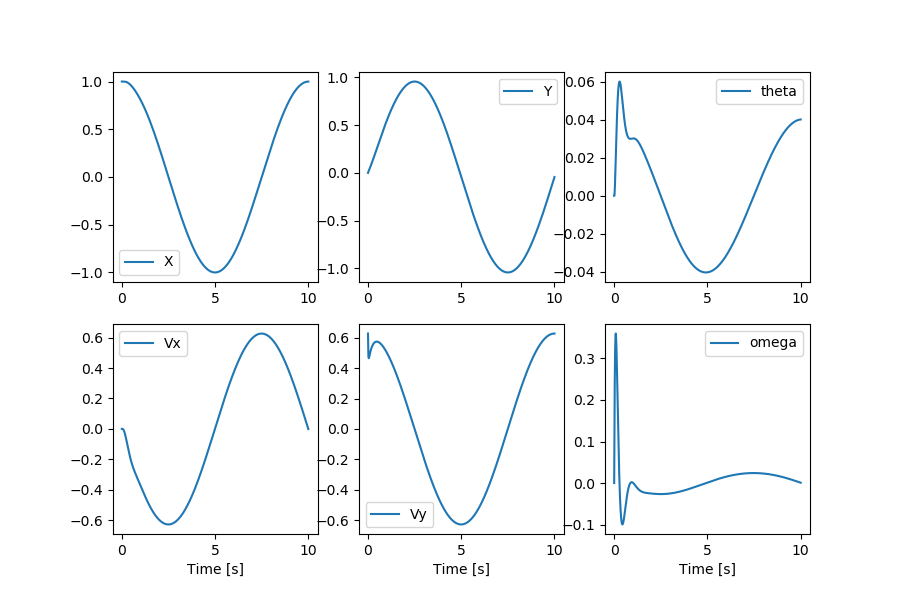

<IPython.core.display.Javascript object>


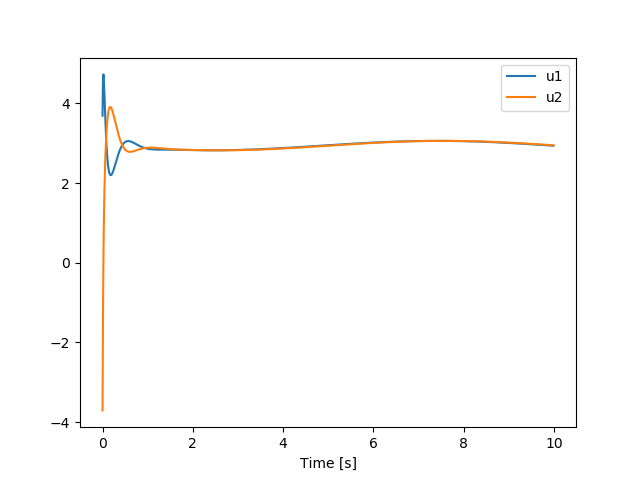

Text(0.5, 0, 'Time [s]')

In [11]:
horizon_length = 1000
z0 = z_bar[:,0]
t, state, u = quadrotor.simulate(z0, controller3_two, horizon_length, disturbance = False)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [12]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABlum1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASmWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2Bwqesq5mmiaOYRdlUgMvwQEU3i
LoCRmnE4HDc4cAp1phPV9GzFVs7ROTdYpr23ZXXKT/8+JgYWclC9rOgNCXFvoYLvZR1sd2ncRkcf
XSkOXqVD/SGc2UDBN3q3T9FRyfkRMAA7u+dPa/m/r/JCD6UWExfrHsJMVWBDuLwZlTFXifd/F7/j
ugIR3mcErbUYTpJekWnpOPSk8TOBEs7Et7jsod5uungEJm3eXSZlmZGMcJP5WYAvDgr0bJhzuxRa
JgAG3OlqOPf1YAKIjE6AJKckpnOEwAgSR41YoEJkNrb4tzFl+RcoQ+vXFLn1ZiRIoUAyFceCDqi5
WMGTsmhAwlO2yg696Z3OfENg308uCJRITljqPtyGFxc3fnYUpzXwCjsIeZny4K1R41xJn5lx6u+A
arO+RIqhbo7jCJHtVH6eH9nDjjh3VLzx8+B2v13knv95w8l0kQb/od7bDSBTHwqZSnTYN2qtCk1J
10fQgYiiPZUebKwwrf3xH9KkfyYMijSb+ZjGUGS3/LmyvGUgoYy07wxKmqP+QuEdxKgiLHLVmg0U
nD7IN+5pgMqioA6HsDGjL14HN4BUc555AKnI61a93rTmrVO+tzI5MKvxVs9TOc1na8lD5HegGyC2
4q6Nz5HyA6Iz35TvgB8tyBng/gDy0mJ8xT2ZVhsZcHzJfx6ui7xXJ5dldbw1D5+XRadWRQtTs1wS
CF2eUZ/iR7YbqkHFho3dyJ8FCIAlMje/OD9T3XByQUTt9OgnQSLWFYfoCQ7UvoqU0WT734UijiaC
pm+AFeObR5z779X+Lu9fq/zRCF5L2ktp9xiRF4O+kDhbFsTQyYR/PRxov4hLbD0M7n2F4FJoZhMm
DhdeXz4QGk0qTVE04qmSVrDWwB36b+FITUyvBoZpkMJsLsMJMSFqP6xP2PTHQV1KzV8UXZc607av
1Ry2rMKqyP7JblFER1SnxkdYAjHCQzs2RoYHwAMy2fzfLgeBv9TM1WFjqEABc52SzhTSZz4nw/UD
w4jbvyq9qgOltoU8/NoKvTgfV9eeMGnHm6/2biHvyf+hWqwg2RaUDVkzHZKg7GNKMKIts1YAOuP8
dwdhHcAorWzis7Q1DOW27VxynWW/9Yqb94L8dR5O4CQ5guJOy8qa5SQhKuNZjHlGysRbCfm9wAAA
CgM7LHMPzcMMiwAAAwAAAwOFYlz9o5gtMJFnTrlBj0NBc4ruO/29gbLdyP0SXk8YLYAswFZGRcAr
7DvlYN92XwRv0aMvUBDm5

<IPython.core.display.Javascript object>


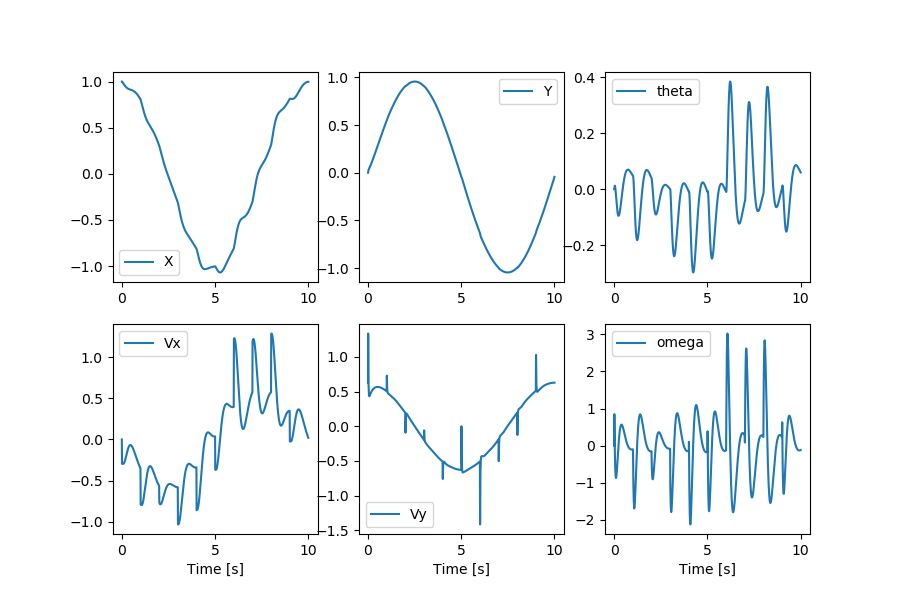

<IPython.core.display.Javascript object>


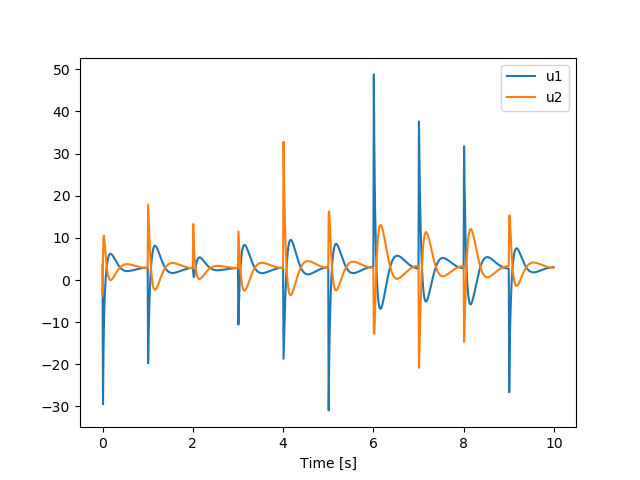

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACBh21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASTGWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXenP0RWuzhVf5LhSh4/pKjOA5Mz+zwYAAugAAAwJ/rl6PI+SdE7yokDO
Jyww/lwIPTXg+lvHHHtpfxUetiFUyWmZqWV7Vj9z9wT/ALctZL9/HHrp2ErRcgP9OS/IT56XLfBs
Alpc07Wwr00XhByc9WuYLaUwATT8vv7QrrzEeloCb0rDZ+tXsxzoxjcKm43oh9GEg3UDCs56Jsw8
DvRrr/L19AMZ51JLCqh26CeYOaCKPO+zFpeAa1dEZSsNCBcF2P7gtfza1ZrPmCEZAG09tBnlUGD3
p+sxgFX9igsrr4v6O7weOpz8Upv6jIHjIzP5WqIZIDTNEgWhQl68zbgvt7J2ra/bwZpM6paJQrTq
RF6IozUT39rF9EoPALmZKgBzf5OtDEzV59Uq2uydq3TcAp+pf+WvI3hAcLs3k7sgzBcrUQ4/nov8
GK8lNNHTUCeCkaZxX4iblyfC8jlPN9oPUsImP64pvAAAAwAAAwAAAwAACVHIU+vOabWLxUieb0Tw
Z0oXGqFZW79X75wHSckPf4eGNjDU7cXTOf9rm7SnwEJr/3+H8YrlaLOTR5xwjgOeIlwh5Bdvigkr
8Yx/N+4A/K+S4L7naydY+eCZAxrBusupZ7jcbwgB1GAtXRTnnl4/zpwx96EVXNLKX8aCpq3YyG9t
Z/T/Xe6+EzfDmxxOH48JraeN6OKsroMxG3U2jhdtiTXnvnUWFwGsoxFsGj0JqvIZr6lDI8CbN2hr
dwC5vgq0pfU+RMim8NhK8WQcrRzvtf/IarYaB9piSAaogkgN03N6wf+RWkwa5J88hG1zLslGP+pH
TP89rzcFKrgD5PFxAMRYGnAXbIBthhbQzGAGPP9H7OC/GdtOGK4KnnY3z7B3JnfpGBHGi3oA+WF/
aoAAAeA2/wgAD2isXJABpMTscAKmY5ER6+rKhyi5C24b05PSFB8Pk0ggohmIxcZh+xlgKDRY8mlC
qHS7xEm6AAROE2dJzfl2Dqpd2NDsS5ruFrOWGZNNybnZgmPbBTpfHg9W2UxJ+ZnR3nILRXDnHL24
4Yiqm5hg6JRlC3/4Zod+2K6jCJjbBpLYpkFsk3og8YD4KF4v8Mm93U0s4Q/Si9I6WTpbzoYyf2AL
FvTzP6sGl1SgPqt9gMxutQcO/jPUleg8dz/CoYcKkq8uZpomjmEXZVIDNkWWnWURdASM04mAlbnD
gFOtMJ6vo05cVnaJx7rFNe27K66CmWZ7WFZAuccafB9bIxR1jGfxlHWx3YtxGRx9dKQ5epWV9IZz
ZQo6zhWyN1BdFNeEwADtwuAQzG2g/rSMq/w5lbF9pwLYqsCMQcr3GmKvE+7+L3/HdAQivM4JW2ow
nSS9khHIbO7L+foAQWSCHqnoc2H8hilJ+Cl8WwDbDcIxIqjdH4YG/992XRDJ0aCcgAAPCNIUALHj
YfACN+WB6q3/D32oAq7JKlsnhYQy2r9MeldnrvvMCHmP25OWcL9kd+A0gRAB02mMoHiY9n8uXThz
+4BJu3mo4iVvBMM3tZRPWAXG7Bt/C0SEHOCGA9yE7LW+g6zM2f8u3mXhMShX/4YB8/duJ1ZiQVd/
lPk/B/afbZnJ1gDb1lYbrLZUbX5Goai3hvrhZFS/zBmjuypiFR9w5La/SKvWXcOgHIokNRtHpZ4s
S/+KSPSQP57rGFU3XNYRYsebTA8L25PXYpHp3E/NZtSUr6cisbmKxhtmFqzQaKTh9j3/c0/GVRUA
dr23xq9eCEDAVHOeeQCpyOpy3ejKh+vDvrcyOTCr8VbR0znNZtC+BA7YduXv/GRAqUpaY/Pkg0X8
dWVQCVG8LnZNS5f81S7OUHaBqf6mQGmbDJDscAyYCA3/HXXO/DU9NGddYXufgiZ7mv1BSlquCU7j
0+vVyF+6fSVozyoKrMG/kFcdwb94EPkOcLaw32YNS5wgUVsQBcVlyOxgxRNPR5EqHbumI+ZNlCVl
sCD9XNB/fpNS4/Av4SuFrj+qCGlcCgRea770bn+1/c9MVl8x4M8kjKjdpu+F98clH48p0ICeNhm6
EXSLsAK7P8J/OX2m0+PbaudfCf++xj5IxAcgtjshJT1mFSuarGRlXMEn/9AskX18SNWnElkNcnR6
dVgQ8YDzqBnklQLCme/GdLNNSZPv359gEumw3MrJvo6O1QngRlwJdBNFvxIRO6v2nH4ew7pDGR+r
6852ElLBo59CL/2uv+wvpbEeDLX22c9oUpymePEUkr9ce8ncaoAGh8Z3ABk5BtfRwuFjzvMM4Sr+
rcBkKuScAMRQ4V+3GRJhRDMSg8zAyCiksM7xVlf8Y40kJ87SYsUANydyzl9bkOf0WrN+Yt2qAAAD
AARTEv0VKDDb67H7FTX5XbAyYrWIoaYCHOBttA9GH5Mv8m9MuUGPDMg4QpwAFTpzh3xSAdEzVgwX
ZMgeJQixbWw2NW1eXLkWn

In [13]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, controller3_two, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)

In [14]:
# Part 3 with desired angle pi/4

def get_linearization(z,u):
    A = np.array([[1, quadrotor.DELTA_T, 0,0,0,0],[0,1,0,0,-quadrotor.DELTA_T*(u[0]+u[1])*math.cos(z[4])/quadrotor.MASS,0],[0,0,1,quadrotor.DELTA_T,0,0],[0,0,0,1,-quadrotor.DELTA_T*(u[0]+u[1])*math.sin(z[4])/quadrotor.MASS,0],[0,0,0,0,1,quadrotor.DELTA_T],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS,-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS, quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,-quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])
    return A, B

pi = math.pi

z_bar = np.zeros((6,2001))

for i in range(2001):
    z_bar[0,i:i+1] = math.cos(2*pi/1000*i)
    z_bar[1,i:i+1] = -(2*pi/10)*math.sin(2*pi/1000*i)    
    z_bar[2,i:i+1] = math.sin(2*pi/1000*i)
    z_bar[3,i:i+1] = (2*pi/10)*math.cos(2*pi/1000*i)
    z_bar[4,i:i+1] = pi/4
    z_bar[5,i:i+1] = 0

N = 2000

Q = np.array([[20000, 0, 0, 0, 0, 0],
             [0, 1000, 0, 0, 0, 0],
             [0, 0, 20000, 0, 0, 0],
             [0, 0, 0, 1000, 0, 0],
             [0, 0, 0, 0, 500, 0],
             [0, 0, 0, 0, 0, 50]])
R = np.identity(2)*1

z0 = z_bar[:,0:1]
U = (0.6*9.81/2)*np.ones([2,])

[A, B] = get_linearization(z0,U)


def solve_LQR_trajectory(Q, R, z_bar, N):
    global A
    global B

    qn = - np.matmul(Q,z_bar)
    PN = Q
    pN = qn[:,-1]
    p = []
    p.append(pN)
    K_gains = []
    k_feedforward = []
    U_star = (0.6*9.81/2)*np.ones([2,])
    for i in reversed(range(N)):
        [A,B] = get_linearization(z_bar[:,i:i+1],U_star)
        tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(R+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),PN),A)
        tempP = Q + np.matmul(np.matmul(A.transpose(),PN),A) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempK)
        tempkn = -np.matmul(np.matmul(np.linalg.inv(R+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),pN)
        temppN = qn[:,i] + np.matmul(A.transpose(),pN) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn)
        PN = tempP
        pN = temppN

        K_gains.insert(0,tempK)
        k_feedforward.insert(0,tempkn)

        


    return K_gains, k_feedforward


[K_g, k_f] = solve_LQR_trajectory(Q,R,z_bar,N)


def controller3_two(state, i):

    U_star = (0.6*9.81/2)*np.ones([2,])
    U = np.reshape(np.matmul(K_g[i],np.reshape(state,(6,1))),(2,))+k_f[i]

    return U


<IPython.core.display.Javascript object>


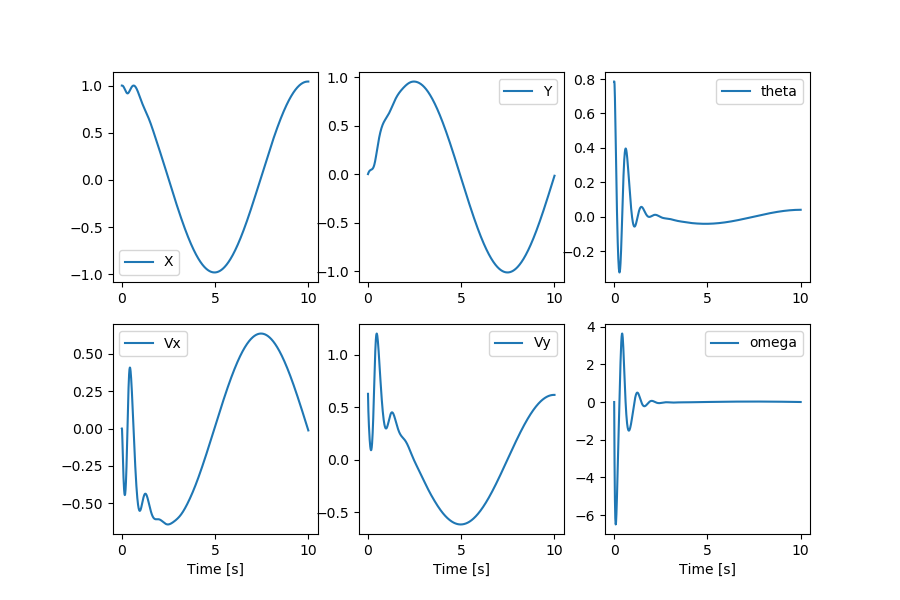

<IPython.core.display.Javascript object>


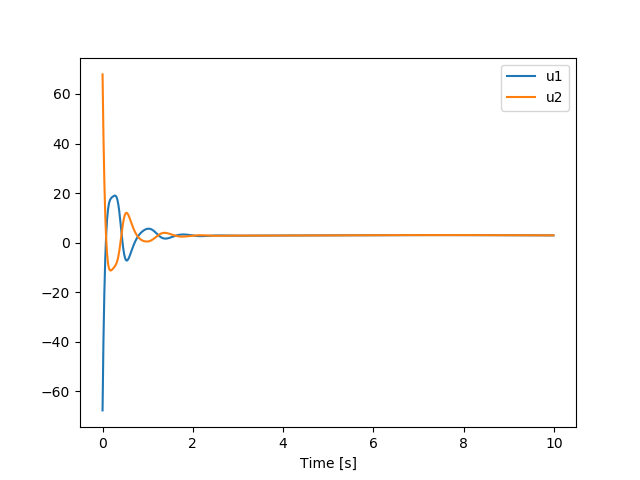

Text(0.5, 0, 'Time [s]')

In [15]:
horizon_length = 1000
z0 = z_bar[:,0]
t, state, u = quadrotor.simulate(z0, controller3_two, horizon_length, disturbance = False)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [16]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB3dG1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAZJGWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOyPaBkwUwso
FwmSNdWS8e8frFa4MOreMIsx86FMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgdhcLMj
nuFGEZeTkAmzvygvcvS4V3pz9EVrs4VX+S4UoeP6SozgM4AL4CiALdOREejyPkmlO8qJAzicsMP5
cCD014Ppbxxx7aX8VHrYhVMlpmalle1Y/c/cE/wC3LWS/fxx66dhK0XID/TkvyE+ely3wbAJaXNO
1sK9NF4QcnPVrmC2lMAE0/L7+0K68xHo16ylYbSnsLJG4uYZsWu6ZrE0iQb0qRWc9E2YeB3o2Nrl
8xFcv8rNSC570BxT7hHkd58iJ56stCiLolYZ8mTRT8z/iv5tWDv2THn89kb+wguO03mzG/62mP8+
d+Mev83rjbw4nxd7+LH+zwaz5juMdf/HvXM0SDms2CLZiKo7T+qakr9vBVJZ4NzgiaOtbnXppv4n
0bWL6JQeAXK3jqTm/ygj0L3RyEPIGEc9edFbgk1FlcyyEYjSZpPDUEZa26Vcm17CJl/tGmEXN4sj
fqaAhLCYCC1B9g+F5HKeaW4UQ1MAAAMAAAMAAAMAAAT+K2WUArTaWSKrtAI6eDOlC41QrK3frgHD
A6Tkh7/DwxsYaibi6Zz/tc3jYypxUn+/w/jFcrRCc+rxrfqgBH8k0Qzj3sFqlfjGP5v3AH5XyXBf
c7aiCShIZjHeGJCIUL0jwSgCH7/g6WI5Y3wvoGv9V1lHoNjhC9o8CUIVtEaUdUZB2ElFA/+dZRoF
P6r03BLXGRc4Q7tUTeP/mZgeDcwDsRGGa8BS9AiFAg7X65zEFYTPeMjX1KGR4E2btC+8OyDCCG33
9ceRMim8NhK8WQcLM4vtDkplhFAF9piSAaogkgNo5Kt7/+RW85M0J80aKqMjvflmtLsKEIYbvCKV
EgHydxuAYiwNOAu2QDbDC2hmMAMef5WOTj8u+ycSxEqedjfPsHcmeGkqBimPH8EpTx/lwAABujMJ
sQAI+HKhqACvMa8qAMy2xz0y5rpDlFyFtw3pyekKD4fJpBBRDMRi4zDljLAUGix5NKFUVtQbweo0
AROE2dJzfl2Dqpd/Xhz5fetp6Pa7J9D6MrQXvWqn6BtL48Ght+eNPMM2OWVtdFcSoJPTYKBvRZZS
5kZORA4tynlceA+TGETG2CptdAILZJvQita2A+CtqW61eWO63QlDs3XGvI+8zk2mjlEAV83Twry9
l3wIvJ2POtxnp6tu58tm74Bn8NXZVqBCiRJ2dUXJHGq47ma3bPEfJJzCICtBV4mg+WM75ydyWbDw
Atf55UswCwKFxx5hC+ZtushUdjVc6PWWb52UBz32Os+SE/i0jfcbCrJWrrkpZkIjdAjcv6y6eDVK
jlB8R9oqOEVKmz3nv0RY7P8kxDTIxXqmkE9KJakVlLEEsDwvcaYq8T7v4vf8d0BCbu82wQG6IaQ5
vxLT62X3s3b4B3HjiIOimU16VE5Umk88Zo7ylvR5/XTwCG7341m38dojd+YAAAMAq3fesAACx55I
YAE+nmGcI6rNT/oD0qd1QOUbcQ8FdF58kfySx/6qLv/0VH9Jh6CV6VLr6NnOf7I2uPwioEQxkNE+
rNMGCf/vPaXfm0uadYQRn2l0tsxdD+LXg+SA8w2D0cEVKiHw0tSQTAqDdkAmajw2zqsPjmLebFsX
MisAOk/qsWSjeS56Jm8qZ/85WirELVcsAWgBjBrmUWTixG5RiP1zmEiekn/JB/AVfAv8Z3JaltQ2
ajRaagxuDsUDv2WZBGuvDydcEaMZVe5cTWWIjQRvSlV3lAs+mjeefaMRCxtdTYuvFasGyX0en8TB
H7Zph4YdTVH/Jx3Hokogpy6VhHIjFs3QKK+KIMkoTwKcfZ0RkAMeuIUUc555AKnI6oST1b0G+HJV
gfUpKVr8VaG3OMAsS5J/uKh2UxPCiBzXBfngHZ/kLsx2wM6hU5QPmQ+r7HOcFVuDoC4+p4MBQhqp
RQzg/rA8ZD7KiQUjel3AbqoW81SVa2z+V+orI0RBnZg48/8bgSe+8k9zf/USdvrGFlkgE1eyTia2
hpAw8IqJ58nq8EpK9u7n7D4rTHOpQrKSHiuUz6UXVBJzzAXtKK4Sen5yRpKNWTkPE13yWNt3q3B4
gCMb+cwZjuWwfw+kDgtMjJ/zO0LRgHj/RPNvpW6EDvP6nwYVBRspIVu0ZR4BGUzZWwljNA72ArDe
RB7b3mDY93FYc9eOR8No/eIZAtZ/UCjdnPVwvbgEMA5izERaAIpiIkeuHW8O4aBeJBqLLqsHLX6V
+N+zhbUyWoI2J7V57ldwFmZjbhJcA2KvZGlqbc1KxF6wovgrE1R/+8B/40YIJ1drQ3JZKj3LG/ck
r/ddQFEB0AC06cn1XTsP9U1GHXxsyM7Ab0dQszPxlBvigYS1Mk+uE5oBJ8zOTuUYSMVXDDcXobFy
b0DS5jZ7sNI7Z+Q+ekAdwFIFdd5xdsTyIxCp60QMnZffFyJ3oMrSvMVpRRJ6d0Hm0hadeF/QFlur
L90/Zpc7FMQouY/ENEGHl

<IPython.core.display.Javascript object>


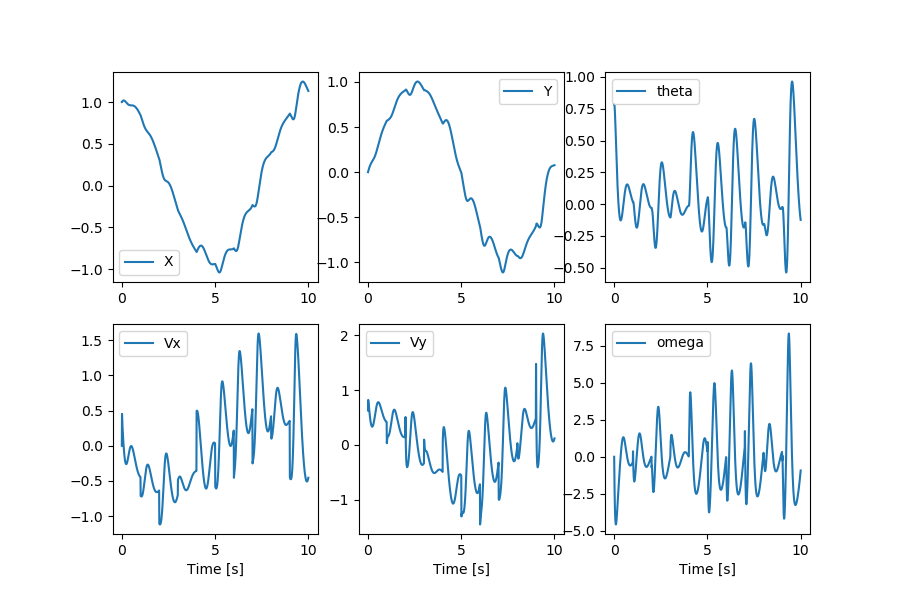

<IPython.core.display.Javascript object>


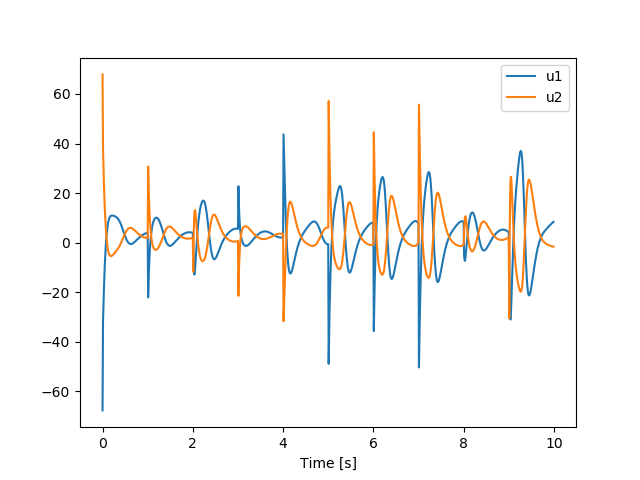

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAC87m1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAZJWWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXenP0RWuzhVf5LhSh4/pKjOA5Mz+zwYAAugAAAwJ/rl6PI+SdE7yokDO
Jyww/lwIPTXg+lvHHHtpfxUetiFUyWmZqWV7Vj9z9wT/ALctZL9/HHrp2ErRcgP9OS/IT56XLfBs
Alpc07Wwr00XhByc9WuYLaUwATT8vv7QrrzEeloCb0rDZ+tXsxzoxjcKm43oh9GEg3UDCs56Jsw8
DvRrr/L19AMZ51JLCqh26CeYOaCKPO+zFpeAa1dEZSsNCBcF2P7gtfza1ZrPmCEZAG09tBnlUGD3
p+sxgFX9igsrr4v6O7weOpz8Upv6jIHjIzP5WqIZIDTNEgWhQl68zbgvt7J2ra/bwZpM6paJQrTq
RF6IozUT39rF9EoPALmZKgBzf5OtDEzV59Uq2uydq3TcAp+pf+WvI3hAcLs3k7sgzBcrUQ4/nov8
GK8lNNHTUCeCkaZxX4iblyfC8jlPN9oPUsImP64pvAAAAwAAAwAAAwAACVHIU+vOabWLxUieb0Tw
Z0oXGqFZW79X75wHSckPf4eGNjDU7cXTOf9rm7SnwEJr/3+H8YrlaLOTR5xwjgOeIlwh5Bdvigkr
8Yx/N+4A/K+S4L7naydY+eCZAxrBusupZ7jcbwgB1GAtXRTnnl4/zpwx96EVXNLKX8aCpq3YyG9t
Z/T/Xe6+EzfDmxxOH48JraeN6OKsroMxG3U2jhdtiTXnvnUWFwGsoxFsGj0JqvIZr6lDI8CbN2hr
dwC5vgq0pfU+RMim8NhK8WQcrRzvtf/IarYaB9piSAaogkgN03N6wf+RWkwa5J88hG1zLslGP+pH
TP89rzcFKrgD5PFxAMRYGnAXbIBthhbQzGAGPP9H7OC/GdtOGK4KnnY3z7B3JnfpGBHGi3oA+WF/
aoAAAeA2/wgAD2isXJABpMTscAKmY5ER6+rKhyi5C24b05PSFB8Pk0ggohmIxcZh+xlgKDRY8mlC
qHS7xEm6AAROE2dJzfl2Dqpd2NDsS5ruFrOWGZNNybnZgmPbBTpfHg9W2UxJ+ZnR3nILRXDnHL24
4Yiqm5hg6JRlC3/4Zod+2K6jCJjbBpLYpkFsk3og8YD4KF4v8Mm93U0s4Q/Si9I6WTpbzoYyf2AL
FvTzP6sGl1SgPqt9gMxutQcO/jPUleg8dz/CoYcKkq8uZpomjmEXZVIDNkWWnWURdASM04mAlbnD
gFOtMJ6vo05cVnaJx7rFNe27K66CmWZ7WFZAuccafB9bIxR1jGfxlHWx3YtxGRx9dKQ5epWV9IZz
ZQo6zhWyN1BdFNeEwADtwuAQzG2g/rSMq/w5lbF9pwLYqsCMQcr3GmKvE+7+L3/HdAQivM4JW2ow
nSS9khHIbO7L+foAQWSCHqnoQ2H7ZbtYnigbfIkN4q2lrH0JGLP6M/mbEzaNN4AABx3dtwBrNKdc
APIs+7F/2ao4xAFJYjlW1pmb6+WOPyX4ZoVoxDwV0XT+J+zZlfVRd/7/w/WGjYUKUIEiHkRDQnf/
2LrCsAmMhon1ZpgwT/957S782lzTrCDJ6xt8SrV5/Sxovfa+ohZ6OCKZgP8adUkEwZtvjMO7FV1M
70iqes3mxbF6DDkLBPCAwTbiIwHtM4CBZbypn/zlaKsQwS0vDWds5GuZRZOLEblK0QwrwkT0ldKw
sYCr4F/ke5LH5DNy9aLTUF7JviYeL5bYyezw0nXBGjGVXuXFJcWI0Eb0pVd5QLPpo3V32jEQtYqR
2MtxjHq2UeTMen8TBH7ZpvkP/YqV9PMzjtP+0xq3I4Rec3xKzvwJNu9ZPLoDse2vIToGUmZQs/o/
QPWU5uQg0aW+eMN+ouz8jkwq/FWfamUWeTDMM7ik/PpTwogc1tX5xB2f5C7L+r4ay/ioHzIfV9jn
OCq3B0BcfU8GAoQ1UosyIPvE7BfcnB4JjteUAYFYt5qkqqMn8r9RWR4SC+zBxz/43AktXT5V9v+o
k4fLgPffEYG/tOJraGRzDz7gnnyerwSkr27ufsPitMc6lCspIxK5TPpRdTwnPMBlUorhJ6fnGEl4
1ZR48TfuMoVuwrUniAI2MMGqQmmrvO7GgbVpkZP+Z2haMA8f6J5t9K3Qgd5/U+DC35DfMhW0rzPf
sZTNzAnyKuglT9v2fOYYJLn0KQt04rDnrxyPhtH7xHIFrKV4YQBIOhLknHgtjlbMRFoAimIlE6mC
XL6jn8skGosuqwctrzOOEMm8CIGU97lqWLz3K7gLMzFG3TjbUVeyNLU25qUocHSkALCtUf/vAf+f
EZaKsOh69WqfXQqPb3tBg636495O454APqDw9qvulBqfJ3O+NmRfSWdrDVR7zxIN8UDCWpkn5B7M
ZdyahRH5ie2t3D1dDSCm2f4gbYLxsbn2kds/LeekAVAFFFdnL8VNn9jG/Ma2AaSdDs/MuoMGVpXm
KtdmhGO6DzZPvevC/oCy3

In [17]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, controller3_two, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)

In [18]:
# Part 4 (Problem 1)

def get_linearization(z,u):
    A = np.array([[1, quadrotor.DELTA_T, 0,0,0,0],[0,1,0,0,-quadrotor.DELTA_T*(u[0]+u[1])*math.cos(z[4])/quadrotor.MASS,0],[0,0,1,quadrotor.DELTA_T,0,0],[0,0,0,1,-quadrotor.DELTA_T*(u[0]+u[1])*math.sin(z[4])/quadrotor.MASS,0],[0,0,0,0,1,quadrotor.DELTA_T],[0,0,0,0,0,1]])
    B = np.array([[0,0],[-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS,-quadrotor.DELTA_T*math.sin(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS, quadrotor.DELTA_T*math.cos(z[4])/quadrotor.MASS],[0,0],[quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA,-quadrotor.DELTA_T*quadrotor.LENGTH/quadrotor.INERTIA]])
    return A, B

pi = math.pi


z_zero = np.zeros((6))
z_three = z_three = np.array([3,0,3,0,0,0])
z_three_pibytwo = np.array([3,0,3,0,pi/2,0])



u_bar = (0.6*9.81/2)*np.ones((2))


Q1 = np.array([[80, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 0, 80, 0, 0, 0],
              [0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0]])
Q2 = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])
Q3 = np.array([[20, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0],
                 [0, 0, 20, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 100, 0],
                 [0, 0, 0, 0, 0, 0]])
R = np.identity(2)*0.5







def compute_cost(z,u, horizon_length):
    J = 0
    for i in range(horizon_length):
        if i >= 0 and i <=50: # 0,0 strong
            # print(z[:,i]-z_zero)
            J = J+np.matmul(np.matmul((z[:,i]-z_zero).transpose(),Q1),(z[:,i]-z_zero)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 50 and i <= 450: # 0,0 not strong
            J = J+np.matmul(np.matmul((z[:,i]-z_zero).transpose(),Q2),(z[:,i]-z_zero)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 450 and i <= 475: # 3,3,0
            J = J+np.matmul(np.matmul((z[:,i]-z_three).transpose(),Q1),(z[:,i]-z_three)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 475 and i <= 525: # 3,3,pi/2
            J = J+np.matmul(np.matmul((z[:,i]-z_three_pibytwo).transpose(),Q3),(z[:,i]-z_three_pibytwo)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 525 and i <= 575: # 3,3,0
            J = J+np.matmul(np.matmul((z[:,i]-z_three).transpose(),Q1),(z[:,i]-z_three)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 575 and i <= 950: # 0,0 not strong
            J = J+np.matmul(np.matmul((z[:,i]-z_zero).transpose(),Q2),(z[:,i]-z_zero)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 950 and i <= horizon_length: # 0,0 strong
            J = J+np.matmul(np.matmul((z[:,i]-z_zero).transpose(),Q1),(z[:,i]-z_zero)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
    J = J+np.matmul(np.matmul((z[:,horizon_length]-z_zero).transpose(),Q1),(z[:,horizon_length]-z_zero))
    return J

    
def get_quadratic_approximation_cost(z, u, horizon_length):
    q = []
    r = []
    Qr = []
    Rr = []
    
    for i in range(horizon_length):
        if i >= 0 and i <=50: # 0,0 strong
            q.append(2*np.matmul(Q1,(z[:,i]-z_zero)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)
        if i > 50 and i <= 450: # 0,0 not strong
            q.append(2*np.matmul(Q2,(z[:,i]-z_zero)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q2)
            Rr.append(2*R)    
        if i > 450 and i <= 475: # 3,3,0
            q.append(2*np.matmul(Q1,(z[:,i]-z_three)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)
        if i > 475 and i <= 525: # 3,3,pi/2
            q.append(2*np.matmul(Q3,(z[:,i]-z_three_pibytwo)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q3)
            Rr.append(2*R)
        if i > 525 and i <= 575: # 3,3,0
            q.append(2*np.matmul(Q1,(z[:,i]-z_three)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)
        if i > 575 and i <= 950: # 0,0 not strong
            q.append(2*np.matmul(Q2,(z[:,i]-z_zero)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q2)
            Rr.append(2*R)
        if i > 950 and i <= horizon_length: # 0,0 strong
            q.append(2*np.matmul(Q1,(z[:,i]-z_zero)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)
    q.append(2*np.matmul(Q1,(z[:,1000]-z_zero)))
    Qr.append(2*Q1)
    return q,r,Qr,Rr
    
    
    
def calculate_trajectory(q,r,Qr,Rr,z_bar,u_bar,N):
    K_gains = []
    k_feedforward = []
    PN = Qr[-1]
    pn = q[-1] # Change it to negative if required
    
    for i in reversed(range(N)):
        [A,B] = get_linearization(z_bar[:,i],u_bar[:,i])
        # print(i)
        
        tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),PN),A)
        # print("tempK",tempK)
        # tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),B),PN),A)
        tempP = Qr[i] + np.matmul(np.matmul(A.transpose(),PN),A) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempK)
        # print("tempP",tempP)
        tempkn = -np.matmul(np.linalg.inv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),(np.matmul(B.transpose(),pn)+r[i]))
        # print("tempkn",tempkn)
        # print("random value",np.matmul(np.matmul(A.transpose(),PN),B))
        # print(np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn))
        temppn = q[i]+np.matmul(A.transpose(),pn)+np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn)
        PN = tempP
        pn = temppn
        
        K_gains.insert(0,tempK)
        k_feedforward.insert(0,tempkn)
    return K_gains, k_feedforward


def controller4(z,i):
    u = (0.6*9.81/2)*np.ones((2)) + (np.matmul(K_gains[i],z)+k_feedforward[i]*alpha)
    return u

# main program
alpha = 1
# initial guesses
z_i = np.zeros((6,1001))
u_i = np.ones((2,1000))*(0.6*9.81/2)

previous_cost = np.inf
cost = 0

while(1):
    
    q,r,Qr,Rr = get_quadratic_approximation_cost(z_i,u_i,1000)
    K_gains,k_feedforward = calculate_trajectory(q,r,Qr,Rr,z_i,u_i,1000)
    while(alpha>0.01):
        t,z_i,u_i = quadrotor.simulate(z_i[:,0],controller4,1000,disturbance=False)
        cost = compute_cost(z_i,u_i,1000)
        # print(cost)
        if(cost<previous_cost):
            break
        else:
            alpha = alpha/2
    error = previous_cost-cost
    if(error<10):
        break
    z_new = z_i
    u_new = u_i
    previous_cost = cost
    

  

<IPython.core.display.Javascript object>


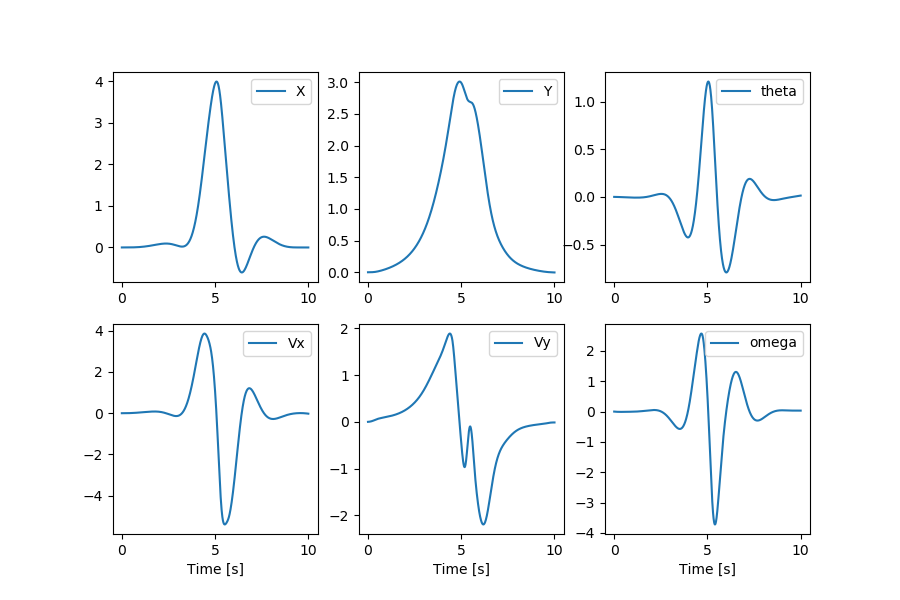

<IPython.core.display.Javascript object>


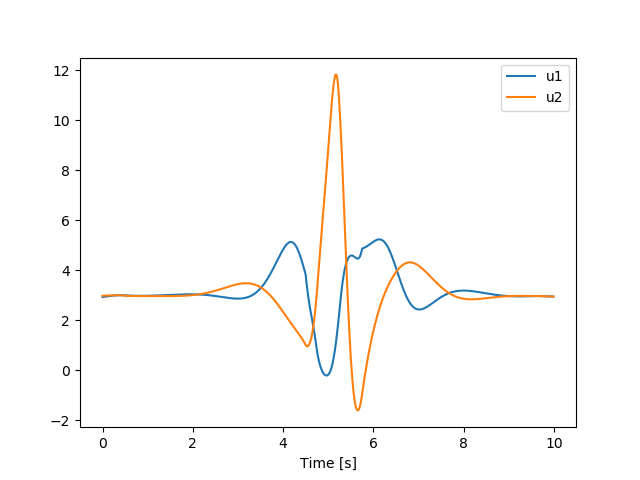

Text(0.5, 0, 'Time [s]')

In [19]:
state = z_new
u = u_new

plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [20]:
quadrotor.animate_robot(z_new,u_new,dt = 0.01)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACAlm1kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASfGWI
hAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADAAADAAADAAqSWJ4ih/F4zfwAAAMAALeA
F7AMIAqoDCo+iHZ3Z08wCIkevjpw21ZE46T3sRhy46F2N9IZFxIUhPZBCiCTW6wKQiOBu94oR2Yu
E9StYqIOVnNKeqSx04QsApp2IUqmKWG06Np+bWY5fUnq7HN65sUwlNWhuXo1pX9mYgT7Ser7mRH+
hQlj3pK4394jsYPZ2HgAt//3pGielLqfKRJ1++ALReZojwl5hmKdVYCJTIW5ShNX+Vy5cW9R1F5r
hvnxIAwgCTYIK0ljKBVUvDhaWgwzL0juuKZs4erxw6CrX5nAOItdrlLIe68DWXvwSOy3W2mgphZW
ihuqd1pWWQToC3Ol4eihqgZPg10yL85pxnWhP72FWa6UKhObVpR9cC86bAlV4WjIcMipSB2FwsyO
e4TdRl5OQCbO/JC9y9LhXhPAjonQzhXeMs5KHv+5doesBCjs+7hYAAXQAAAYE/1y9HkfJOid5USB
nE5YYfy4EHprwfS3jjj20v4qPWxCqZLTM1LK9qx+5+4J/gFuWsl+/jj107CVouQH+nJfkJ89Llvg
2AS0uadrYV6aLwg5OerXMFtKYAJp+X39oV15iPS0BN6Vhs/Wr2Y50YxuFTcb0Q+jCQbqBhWc9E2Y
eB3o11/l6+gGNTbS4RuQ7dBRU+4Xg8tk/yeerLQoi6JWGhAuC7H9wWv5tas1nzBCMgDae2gzyqDB
70/WYwCr+xQWV18X9Hd4PHU5+KU39RkDxkZn8rVEMkBpmiQLQoS9eZtwX29k7Vtft4M0mdUtUYOA
R+WTxNuM9/axfRKDwC6Lso6v7ZLJgNMZ75TqtjUEO50Bsvvh51mjL+vI3mS3yLKZx5BmC5Wohx/P
u/4MV5KaaKm21cxpGziwJVMbgdx5HKeaM8ERSRJH32KJAAADAAADAAADAAAFOitllAK02sXifhQC
OngzpQuNUKyt3x2jzgOk5Ie/w8MbGGnm4umc/7XN19PgITX/v8P4xXK0TcmjzjhHAc8RLhDyC7Ld
BJX4xj+b9wB+V8lwX3O1onZ2Ama7GsG6y6lk5uEIKAHUYC1dFOeeYv/OpDToh6+OjcOraKypNa+5
jbWf0/13uvhO/hI2RxvdAsmhD2hkt4/+ZmB4NzAOa2xJrzxrorC4DWUlgtWFaE1Xg3jnShkeBNm7
Vkeqr96hDcVMqPImRTeGwleLIO8lU3wr/kNVsKw+0xJANUQSQG3Lh1WP/Aq/YNck+eSTYpdj/yzW
l2FCEMN3W7gNAD5PFxyyFAShfe2QDbBe2hmMAMef5V2eFXoaFOMXBPEYZSxTOHKafnfip6LegD5O
ZAkAAG7d3LMH/fFUIBEiZCSQAPklkiEAG/KYO0BBQjIiPX15QOUXIW3DenJ6QoOLTwkEFEMxGLjM
OU0sBQaLHk0oVQ71BvB6jHiJ5TZ0nN+XYOql3Yz+xLmu4Ws5YZk03NFUvWaGEb8DxS+LX7mNOjeI
g1GYyEG4O1O9LFEVBxhMQ42NRjj/lmh37YrqMImNsGXNs2QWyTeiDxgPgoXjHwyb3dTSzhD9KM12
MNN752bP1vYAsW9Xtt8/714Cr+3pyW6IE1Bw7+M9YAAYT9f0l2B0ULMiEUSZ2UBz3uZUC5YZO2Sb
BGCM0lTJSXnpPksokrdJbq8PsFkjFOnpNt2WPuLfjjvizgXOONPg+uYhgmmNdjKOtkEkbiMjj66U
hy9TLP6/k+vBOYa2+McvfW5Fdl8yLA+YSm1/N/X+SEYneb46xUGK3xLFOWBbDMqYq8T7v4vf8d0B
Cju82wQG6IaQ50asdogx0hu0UFpi510GqPbbiqN/fEpJpVZo/Nh1R3wzKSw6G5arF3yhIZSIAAql
56s2d+ZwAACk19VPa0bIp4oECr8h5rJ9azIfJ302flscXf1G1Spp5fFIE3woF+g7juWMgkzJ3E68
i8ICyu+qGJNVJmrIzDvpA/JwL3v7Vvyim5Jh5RIet5Q9QUNdVVisrL9Ag4MhAF+AS9F4U2rnDdYM
IbvU/yQwWIf/aQ7JkdUrxAJNirtXVY/eAVeoXCPrAO7k3sz8EU+kY3J9pmZdApg/HKTNTetWhGZ/
RhCNQco5lVRjxQk4VgvmysMK398R/VRT9WBpGnA1IF9Bn4x6kQ6wyVTXSjhXUojBo1NUf8sl80mK
q5jaF2ppaes6VFHK+0Tm02MDuhQf2YQTLrnHZQW9+AwU00ue20lWmRZ6y6GvXtR9Smh0x02/z6YP
AjcPovvBhhLb39TPJj2ORcKmehcFlbiqWkEbqIKPsaC+8/z2URCwui856IpEwRJAV/o2t3qSYdLX
wzjc189foT/GH+zQs6rxB+feZaTOepMin5TpXEfJ0aTYkHfXhMsrw2UoCYtAk3Fpu9KLXDSu6ogZ
DQ8azWC+zAY52ZY+LirpOxqSH3NFLUzb1yxsIOcp7IpTdL2x9F2BWvEmxZ9yx4vNJerPq8Wt7NVi
u1cAM6KEokJv3pCeJksY54reurMbfBkQSSNvpv6t3W2+kb7ZxZiEeNc0FAVys5gGmzrOz1vmk4J4
38gotxGFVKQS6X5p9AzY4me6oHI9HWO1+nn1o3RCzJDzORVqcFGwgIGEZ0G+peMAJXR3X7ENVNQa
zemKJbCAAucu7jzRHUQnuw1e6KekgcfX5ETvGJYy3th3SGMj9X16f8JKYRLervkffk/+rNGTFb+r
b0Jh6e7LEH7EeQ/XNTY1V/38glZ+yiSEvYeL0w1k/GcxChREAUer3b3ckYykvLXvKY7sR7j7EW8C
N0APjBSdRHDIl4/l9qiLKIAAAEiIyKjzXDKExhOsOqKkAAADAAAkiLP9g4Gj8weJCINovDVNd3Iu
B3ZmOwkYbMSTEEcXYOX8r

In [21]:
# Part 4 (Problem 2)

z_zero = np.zeros((6))
z_onefive = np.array([1.5,0,3,0,0,0])
z_onefive_three_pibytwo = np.array([1.5,0,3,0,pi/2,0])
z_onefive_three_pi = np.array([1.5,0,3,0,pi,0])
z_onefive_three_pi_bytwo = np.array([1.5,0,0,0,3*pi/2,0])
z_last = np.array([3,0,0,0,2*pi,0])



u_bar = (0.6*9.81/2)*np.ones((2))


Q1 = np.array([[800, 0, 0, 0, 0, 0],
              [0, 100, 0, 0, 0, 0],
              [0, 0, 800, 0, 0, 0],
              [0, 0, 0, 100, 0, 0],
              [0, 0, 0, 0, 10, 0],
              [0, 0, 0, 0, 0, 10]])
Q2 = np.array([[10000, 0, 0, 0, 0, 0],
              [0, 100, 0, 0, 0, 0],
              [0, 0, 30000, 0, 0, 0],
              [0, 0, 0, 100, 0, 0],
              [0, 0, 0, 0, 800, 0],
              [0, 0, 0, 0, 0, 100]])
Q3 = np.array([[50, 0, 0, 0, 0, 0],
                 [0, 30, 0, 0, 0, 0],
                 [0, 0, 50, 0, 0, 0],
                 [0, 0, 0, 20, 0, 0],
                 [0, 0, 0, 0, 1200, 0],
                 [0, 0, 0, 0, 0, 10]])


R = np.array([[1, 0],
             [0, 1]])*25


def compute_cost(z,u, horizon_length):
    J = 0
    for i in range(horizon_length):
        if i >= 0 and i <=50: # 0,0 strong
            # print(z[:,i]-z_zero)
            J = J+np.matmul(np.matmul((z[:,i]-z_zero).transpose(),Q1),(z[:,i]-z_zero)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 50 and i <= 450: # 0,0 not strong
            J = J+np.matmul(np.matmul((z[:,i]-z_onefive).transpose(),Q1),(z[:,i]-z_onefive)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 450 and i <= 470: # 3,3,0
            J = J+np.matmul(np.matmul((z[:,i]-z_onefive_three_pibytwo).transpose(),Q3),(z[:,i]-z_onefive_three_pibytwo)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 470 and i <= 520: # 3,3,pi/2
            J = J+np.matmul(np.matmul((z[:,i]-z_onefive_three_pi).transpose(),Q3),(z[:,i]-z_onefive_three_pi)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 520 and i <= 600: # 3,3,0
            J = J+np.matmul(np.matmul((z[:,i]-z_onefive_three_pi_bytwo).transpose(),Q3),(z[:,i]-z_onefive_three_pi_bytwo)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 600 and i <= 950: # 0,0 not strong
            J = J+np.matmul(np.matmul((z[:,i]-z_last).transpose(),Q2),(z[:,i]-z_last)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
        if i > 950 and i <= horizon_length: # 0,0 strong
            J = J+np.matmul(np.matmul((z[:,i]-z_last).transpose(),Q2),(z[:,i]-z_last)) + np.matmul(np.matmul((u[:,i]-u_bar).transpose(),R),(u[:,i]-u_bar))
    J = J+np.matmul(np.matmul((z[:,horizon_length]-z_last).transpose(),Q2),(z[:,horizon_length]-z_last))
    return J

    
def get_quadratic_approximation_cost(z, u, horizon_length):
    q = []
    r = []
    Qr = []
    Rr = []
    
    for i in range(horizon_length):
        if i >= 0 and i <=50: # 0,0 strong
            q.append(2*np.matmul(Q1,(z[:,i]-z_zero)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)
        if i > 50 and i <= 450: # 0,0 not strong
            q.append(2*np.matmul(Q1,(z[:,i]-z_onefive)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q1)
            Rr.append(2*R)    
        if i > 450 and i <= 470: # 3,3,0
            q.append(2*np.matmul(Q3,(z[:,i]-z_onefive_three_pibytwo)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q3)
            Rr.append(2*R)
        if i > 470 and i <= 520: # 3,3,pi/2
            q.append(2*np.matmul(Q3,(z[:,i]-z_onefive_three_pi)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q3)
            Rr.append(2*R)
        if i > 520 and i <= 600: # 3,3,0
            q.append(2*np.matmul(Q3,(z[:,i]-z_onefive_three_pi_bytwo)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q3)
            Rr.append(2*R)
        if i > 600 and i <= 950: # 0,0 not strong
            q.append(2*np.matmul(Q2,(z[:,i]-z_last)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q2)
            Rr.append(2*R)
        if i > 950 and i <= horizon_length: # 0,0 strong
            q.append(2*np.matmul(Q2,(z[:,i]-z_last)))
            r.append(2*np.matmul(R,(u[:,i]-u_bar)))
            Qr.append(2*Q2)
            Rr.append(2*R)
    q.append(2*np.matmul(Q2,(z[:,1000]-z_last)))
    Qr.append(2*Q2)
    return q,r,Qr,Rr
    

In [22]:
def calculate_trajectory(q,r,Qr,Rr,z_bar,u_bar,N):
    K_gains = []
    k_feedforward = []
    PN = Qr[-1]
    pn = q[-1] # Change it to negative if required
    
    for i in reversed(range(N)):
        [A,B] = get_linearization(z_bar[:,i],u_bar[:,i])
        # print(i)
        
        tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),B.transpose()),PN),A)
        # print("tempK",tempK)
        # tempK = -np.matmul(np.matmul(np.matmul(np.linalg.pinv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),B),PN),A)
        tempP = Qr[i] + np.matmul(np.matmul(A.transpose(),PN),A) + np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempK)
        # print("tempP",tempP)
        tempkn = -np.matmul(np.linalg.inv(Rr[i]+np.matmul(np.matmul(B.transpose(),PN),B)),(np.matmul(B.transpose(),pn)+r[i]))
        # print("tempkn",tempkn)
        # print("random value",np.matmul(np.matmul(A.transpose(),PN),B))
        # print(np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn))
        temppn = q[i]+np.matmul(A.transpose(),pn)+np.matmul(np.matmul(np.matmul(A.transpose(),PN),B),tempkn)
        PN = tempP
        pn = temppn
        
        K_gains.insert(0,tempK)
        k_feedforward.insert(0,tempkn)
    return K_gains, k_feedforward


def controller4(z,i):
    u = (0.6*9.81/2)*np.ones((2)) + (np.matmul(K_gains[i],z)+k_feedforward[i]*alpha)
    return u

# main program
alpha = 1
# initial guesses
z_i = np.zeros((6,1001))
u_i = np.ones((2,1000))*(0.6*9.81/2)

previous_cost = np.inf
cost = 0

    
while(1):
    
    q,r,Qr,Rr = get_quadratic_approximation_cost(z_i,u_i,1000)
    K_gains,k_feedforward = calculate_trajectory(q,r,Qr,Rr,z_i,u_i,1000)
    while(alpha>0.01):
        t,z_i,u_i = quadrotor.simulate(z_i[:,0],controller4,1000,disturbance=False)
        cost = compute_cost(z_i,u_i,1000)
        # print(cost)
        if(cost<previous_cost):
            break
        else:
            alpha = alpha/2
    error = previous_cost-cost
    if(error<10):
        break
    z_new = z_i
    u_new = u_i
    previous_cost = cost

<IPython.core.display.Javascript object>


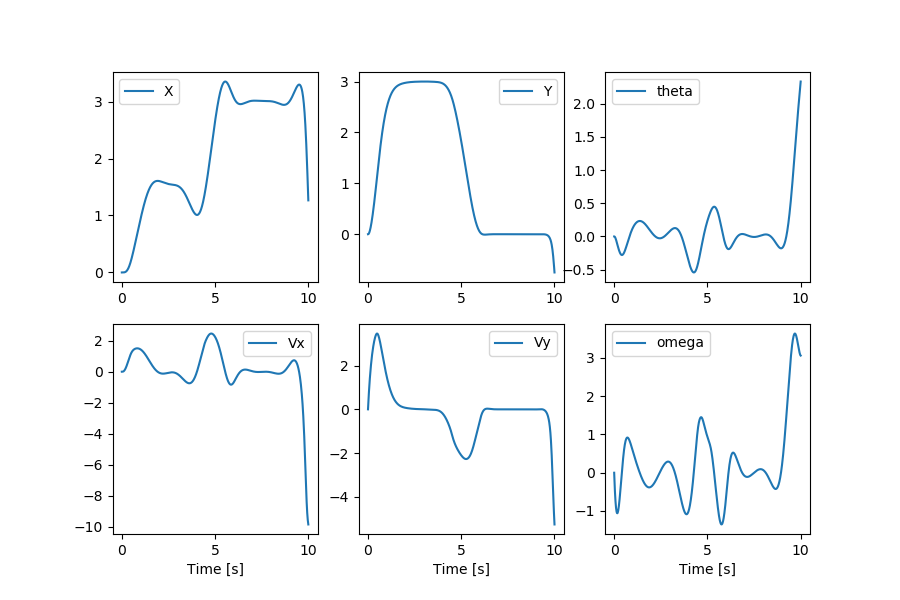

<IPython.core.display.Javascript object>


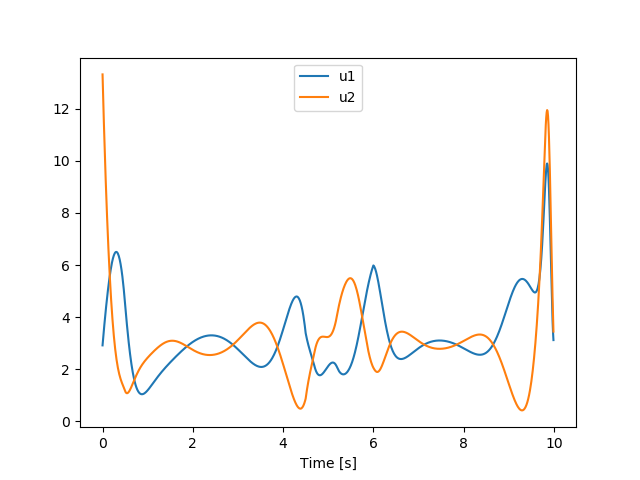

Text(0.5, 0, 'Time [s]')

In [23]:
state = z_new
u = u_new

plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [24]:
quadrotor.animate_robot(z_new,u_new,dt = 0.01)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACGu21kYXQAAAKvBgX//6vcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MjQgbG9v
a2FoZWFkX3RocmVhZHM9NCBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh
Y2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly
YW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3
ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJl
c2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAg
cXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAASbGWI
hAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADAAYjEjf+h/F4zfwAAAMAALcA
GFAMIAqoDCop7v4n7qcQC2GTfPg0RWyJcNZnZIg+ms2iWsBb1ygUhAZBCiCTW6wKSTuAotxSMtmu
F6Ne0JRw9SOVthzL7K70lZCO9aS6cBU914O/IX20vFWMimi1psUwlNWhufuw0v9mYgT7Ser7mL/9
3+1bzHmP9ZZSbcPW2Hfgtv+WpGielLqPJWaGhBm8hUCYOBwO6jk+VYPTf6/Du1ir31n7L5sfJF40
WvGjfPYQDhAEmwQVpHGUCqNKDUSWRVYyXlgcUxYw9XjhTz+vx76BgcaMJ4KVpVnwEfgUbplaCSJx
FPqKGwp3WlZZBOgJrXBhRrpbFmPW16yiB2HGdaE/rYVZrpQqE/NWlCVwLzFsSVXhaMhwyKlIHYXC
zI57g+OIMWaAJiq8F6w7jkIzR52fDWmpLT/JM4U8H7+45gKyAC4c1qQfVsAiIFyb3D+8opEDm7+u
Xo8juEqncv6gZxOWGH8uBB6aHZit4449tL+KjpsQqmS0zNSyvashy/uCf4BblrJfv449dKhYrC6T
G91BpLoDH0vNGwCWlzTtbCuDReEHJz1a5gtpSuBNPy+/tCuvMRyNfLpWG0p7CyRuLmGbFrumaxNI
kG/qkVnPRNmHgd6Nja5fMRXr+UjhO3lBEGAczrde1PsoH9Ax7FV0SsM+DJoqjZ/wPI2q237Jjz+e
yN/YQXHabzJjf9bSH+fO/GPQjyQt4d7vCvix/s8Gs+Y7jJp7n8pVI0SF5rOdTnfxR2n9U1JX7eDF
i4P2dkCsc2GAdHNqw12fwMlPvQD/ffuAzAECmgOMCSsaQkVq6E1H6DLfWBAbL75xpV+wcY7/0gho
uh1XxxRiuVqIcf0C/9YBOSmjNBnEuQICvPKGUiowe96jlPQQcBdAWAAAAwAAAwAAAwAABGGMjJXn
NOCVsrKahwR4M6ULjVCsrd+nqf8lgnJD3+HhjYw0Vt7FTn/a5uwJ7sp642MpE02THY41HqCsfqgB
H8k0Qzjx60EjFP/2a0os/APLEUnotBPsSkpRjHeGJCIUL0jzdFCQAPEp5EDgt4DF9/9YoYtiMccX
uXWJCM0Z57/4i5Y8+voH/zrKNA3ddhzoT3LRU4Q7j5HeP/mZgeDcwEenGGa8CvcI19Ag7Za2kPHS
Ez59tZzChkeBNm7Q/82AxCdwjXGi8lfMN4bCV4shGIPjVC7+Q1PM0Wd+iSAXuNJoJhWY9X/8Cspd
A2dJotYCpo9j5r/vdM/z2vNwGMwAPk7kMAxFgacBdsgG2EptDMYAY8/398qX3XztQl70Us7G+fYO
5NAb47sRDDn4AAADAAADAAADALLsJKEZERdQ/SVyi5C24b05PSFB8P+EggohmIxcZh7ilgKDRY8m
lCp/vuUoeoz/CeVYs8SGAqDqpd/ldZ6TVtp6Pa7J9D6MqQvfmHOnEWv62by01WEgoyc6MQVTAmkp
8fTYKBfRZZS5kZOU05+NF8d+2K6jCJjbBYBjHUFsk3oRyhbAfBW1L9a4LHdboSh2brjpwI9ZsAWv
dc7mjnai17tbqgY2h0IiD33G2OVwrc4GbhdrdTFdKMpk5M4jQGMx4KLGTJ4mSEYu7PsrphJelvmI
D1OsWQ88QQ2hytRQuxwZUJxSvGPSYwyhLwA/bMbW6uSParFUe35w8duye5x8/Nttz118ofm9xsKr
kZkUNFdHzDFsj8vtUI/7Ii2Ed5QxUqOR3hQ4AMKDpIRZE3e+6a52hfIT2pdmTKswShcvPtRTdYcR
YqznTfYvjj74BCu1ebYIDdENIc+rcxMM4pBZv4l3M/zv7YXC/BfC1bd4cAUAGucnyG2yzR1hQMQi
fMltSy4oIUhVj7lZEoRUAPaG6wfohnBr0wtTYkejZKQrnrQEylgSaI7Kh7dMP7B/eTBZLqAy3lyR
AM5F1feEook3AbPjHM8Fj7xccmd3mxQtJy8hKRlxx5oIofWG5GU/laKWHK60um/M52YtEaCG/jMn
tepzZ+ySnpavRo6vToh6QipaKe2nQ8v+M29PV+zmnehboon7kI0K1U4pOjEcSVOQM4YAdWGmbtjS
V6tvQkUyyavaO7ZU0PEQs8EUE9LeRw5lfml32GXNOb7CFqxp0VwE4sWpCwYw4+u1xy2bDCa9WZmW
GKxX9MeMVSnazpRXa9a6o8gsQMOWfFGFM/D6MKOEygt78BgpppdsbZQ+bbIHzYj2HMKum6X/+FPz
eIXU/I9U97/mG4lc9Glk4IlfytCKKnfpc3E+YSmgQGd2soi3psec9EUi6y5laJxxYps2fn13RJc3
XTiWkE2Krc22IhKUKEZzv+QqWFbWbdx+ck0uxLtOtuaLITTmyAtnaEMaSmVuFYktRkSyU/qkkS2U
BfxBIPwFBDF2PRctAad4M2UwQbooEsXQNMM4kYijYP062EzMAVnlo3Jqb0s/JFWrYODntvAz9XK8
xLpKzxZ0+CLJTd5/PdKzxAgo4PYA30gAlA1ARbkm9N2HlZqImyID6BDw/saEpu8EHa5e3lthhsxj
g7iYyanHoNoAALkSfkJ5MC56BPhwhENT1eJ0njsvOycSBAABSs8jWJqEsRHHjQAc52Ahd+vNXvP8
aE6wEXP7YcPbBgLSuv0P9+7TnGjjr0I0QZTr170PaKcLKBIqeayRYhTKGow0Oeg4CxW1f5PnibAI
mDPkbhvhxiTOZl2ZnbG6/3OhCcEG/xNVU8Ysh8YUM5tg6WFW+7OlmXrHUK9WPOkyFQh3JWmd+YAA
BpAAAAMACe/8Tw2ybzNA5myKR+l9eULvN13Oyg7Kz419H0lVH6FRoVH1bvm2tH5mtVZODlywmt7k
Pd/aCbYDFOlaA8M2fTrwd